In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/SirLawrenceKatz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import re
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [49]:
d_df = pickle.load( open('d_df.pkl', "rb" ) )
b_df = pickle.load( open('b_df.pkl', "rb" ) )
a_df = pickle.load( open('after_df.pkl', "rb" ) )


(377181, 17)

In [5]:
#before sent
sid = SentimentIntensityAnalyzer()
sentiment1 = pd.DataFrame()
sentiment1['username'] = b_df.username
sentiment1['date'] = b_df.date
sentiment1['tweet'] = b_df.tweet
sentiment1['scores'] = b_df.tweet.apply(lambda Text: sid.polarity_scores(Text))
# sentiment1['pos']  = b_df['scores'].apply(lambda score_dict: score_dict['pos'])
# sentiment1['neg']  = b_df['scores'].apply(lambda score_dict: score_dict['neg'])
# sentiment1['compound']  = b_df['tweet'].apply(lambda score_dict: score_dict['compound'])
# sentiment1.drop(columns='scores',inplace=True)
# # sentiment['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
sentiment1

,username,date,tweet,scores
0,mtg72252,2017-09-28,nunyagator jbingainesville coachmcelwain...,"{'neg': 0.139, 'neu': 0.587, 'pos': 0.275, 'co..."
1,fireboltstudio,2017-09-28,them dont jump the gun me so a server w...,"{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp..."
3,niveanotes,2017-09-28,time tell me again how guns save lives,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp..."
5,bear_faced_lady,2017-09-28,i kill this in a good way on karaoke honestly...,"{'neg': 0.159, 'neu': 0.541, 'pos': 0.301, 'co..."
6,yung_berg21,2017-09-28,road rage incident dude just said he was gone ...,"{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'comp..."
...,...,...,...,...
445105,atheistbhakt,2017-09-25,wolveruddin f muslim massacre u say us sold...,"{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'comp..."
445106,jaclyncwhite,2017-09-25,warriors for the gods dairies machine gun m...,"{'neg': 0.119, 'neu': 0.796, 'pos': 0.085, 'co..."
445107,musesofsteele,2017-09-25,dacialynnx you can target who you want but th...,"{'neg': 0.118, 'neu': 0.573, 'pos': 0.309, 'co..."
445108,justicebeat2day,2017-09-25,alabama teen shot after police mistake saxopho...,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."


In [7]:
new_column = []
for  i in sentiment1['scores']:
    new_column.append(i['compound'])
new_column
    
sentiment1['compound'] = new_column
sentiment1
sentiment1

,username,date,tweet,scores,compound
0,mtg72252,2017-09-28,nunyagator jbingainesville coachmcelwain...,"{'neg': 0.139, 'neu': 0.587, 'pos': 0.275, 'co...",0.7269
1,fireboltstudio,2017-09-28,them dont jump the gun me so a server w...,"{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...",0.4829
3,niveanotes,2017-09-28,time tell me again how guns save lives,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...",0.4939
5,bear_faced_lady,2017-09-28,i kill this in a good way on karaoke honestly...,"{'neg': 0.159, 'neu': 0.541, 'pos': 0.301, 'co...",0.4939
6,yung_berg21,2017-09-28,road rage incident dude just said he was gone ...,"{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'comp...",-0.7184
...,...,...,...,...,...
445105,atheistbhakt,2017-09-25,wolveruddin f muslim massacre u say us sold...,"{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'comp...",-0.2732
445106,jaclyncwhite,2017-09-25,warriors for the gods dairies machine gun m...,"{'neg': 0.119, 'neu': 0.796, 'pos': 0.085, 'co...",-0.1779
445107,musesofsteele,2017-09-25,dacialynnx you can target who you want but th...,"{'neg': 0.118, 'neu': 0.573, 'pos': 0.309, 'co...",0.6124
445108,justicebeat2day,2017-09-25,alabama teen shot after police mistake saxopho...,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.5859


In [31]:

what = sentiment1.groupby('date')['compound'].mean()
b_sent = pd.DataFrame({'date':what.index, 'compound score':what.values})
b_sent

,date,compound score
0,2017-09-23,-0.157865
1,2017-09-24,-0.201924
2,2017-09-25,-0.202762
3,2017-09-26,-0.191288
4,2017-09-27,-0.174937
5,2017-09-28,-0.179795


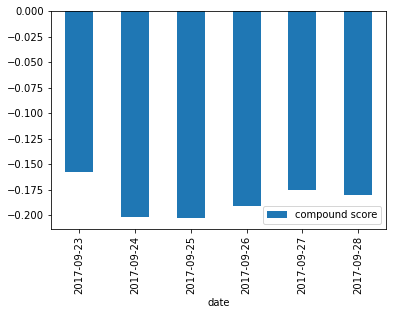

In [33]:
b_sent.plot(x = "date", y = "compound score", kind = "bar")
plt.show()

In [8]:
#during sent
sid = SentimentIntensityAnalyzer()
sentiment2 = pd.DataFrame()
sentiment2['username'] = b_df.username
sentiment2['date'] = d_df.date
sentiment2['tweet'] = d_df.tweet
sentiment2['scores'] = d_df.tweet.apply(lambda Text: sid.polarity_scores(Text))
# sentiment1['pos']  = b_df['scores'].apply(lambda score_dict: score_dict['pos'])
# sentiment1['neg']  = b_df['scores'].apply(lambda score_dict: score_dict['neg'])
# sentiment1['compound']  = b_df['scores'].apply(lambda score_dict: score_dict['compound'])
# sentiment1.drop(columns='scores',inplace=True)
# sentiment['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [13]:
sentiment2.shape
sentiment2 = sentiment2.dropna(how='any',axis=0)
sentiment2.shape

(262123, 4)

In [14]:
new_column = []
for  i in sentiment2['scores']:
    new_column.append(i['compound'])
new_column
    
sentiment2['compound'] = new_column
sentiment2

,username,date,tweet,scores,compound
0,mtg72252,2017-10-08,google take down instructional videos for ill...,"{'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound...",-0.7184
1,fireboltstudio,2017-10-08,realdonaldtrump nypost yes because exactly w...,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.7184
3,niveanotes,2017-10-08,video steve scalise ‘the problem is not tha...,"{'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...",-0.4019
5,bear_faced_lady,2017-10-08,nbcsnl exposes their hatred for those in the...,"{'neg': 0.509, 'neu': 0.491, 'pos': 0.0, 'comp...",-0.9100
6,yung_berg21,2017-10-08,im not in favor of toddlers having access to g...,"{'neg': 0.168, 'neu': 0.612, 'pos': 0.22, 'com...",0.3489
...,...,...,...,...,...
413038,theodialect,2017-10-08,this needs to stop american guns https ...,"{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...",-0.2960
413041,twentyfourhertz,2017-10-08,gun control and history it s never been about...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.3400
413042,cmd366,2017-10-08,realjameswoods nra not gun owners you me...,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.6943
413043,comicstewiesob1,2017-10-08,factnamara i’m always the nail gun don’t ev...,"{'neg': 0.14, 'neu': 0.756, 'pos': 0.105, 'com...",-0.1531


In [36]:
what = sentiment2.groupby('date')['compound'].mean()
d_sent = pd.DataFrame({'date':what.index, 'compound score':what.values})
d_sent.head(10)

,date,compound score
0,2017-10-05,-0.280164
1,2017-10-06,-0.262155
2,2017-10-07,-0.239909
3,2017-10-08,-0.262509


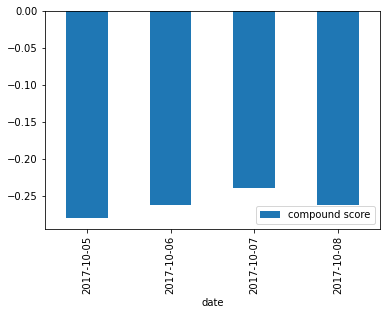

In [35]:
d_sent.plot(x = "date", y = "compound score", kind = "bar")
plt.show()

In [15]:
#after sent
sid = SentimentIntensityAnalyzer()
sentiment3 = pd.DataFrame()
sentiment3['username'] = a_df.username
sentiment3['date'] = a_df.date
sentiment3['tweet'] = a_df.tweet
sentiment3['scores'] = a_df.tweet.apply(lambda Text: sid.polarity_scores(Text))
# sentiment3['pos']  = a_df['scores'].apply(lambda score_dict: score_dict['pos'])
# sentiment3['neg']  = a_df['scores'].apply(lambda score_dict: score_dict['neg'])
# sentiment3['compound']  = a_df['scores'].apply(lambda score_dict: score_dict['compound'])
# sentiment3.drop(columns='scores',inplace=True)
# sentiment['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [42]:
new_column = []
for  i in sentiment3['scores']:
    new_column.append(i['compound'])
new_column
    
sentiment3['compound'] = new_column
sentiment3

,username,date,tweet,scores,compound
0,mocamocamon2,2017-12-28,@chinatsu_gun やばいとこしかないとかじゃなくて良かったわ笑 ありがとう！,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,stonekettle,2017-12-28,@wigwam He could have stopped being an asshole...,"{'neg': 0.305, 'neu': 0.63, 'pos': 0.065, 'com...",-0.9419
2,fixedintime,2017-12-28,"@billmaher Nope, they just might pull out a gun.","{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",-0.3400
3,rdtpokescans,2017-12-28,Lapras ♀ Water Gun/Blizzard (IV: 47% - CP: 750...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,milhouzze_,2017-12-28,@ClingCIang He’s making gun and bomb noises......,"{'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'comp...",-0.6808
...,...,...,...,...,...
29323,gun_romance,2017-12-27,はい欲しい,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
29324,tdps_subreddit,2017-12-27,Even Barack Obama thought gun confiscation was...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",-0.8748
29325,p227sig,2017-12-27,How I feel when talking guns 😂😂😂 https://t.co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
29326,yeongdong_gun,2017-12-27,"&lt;영동군 농업기계팀 자격증 도전자, 전원‘농기계정비기능사’ 취득&gt; ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [40]:
what = sentiment3.groupby('date')['compound'].mean()
a_sent = pd.DataFrame({'date':what.index, 'compound score':what.values})
a_sent

,date,compound score
0,2017-12-27,-0.147225
1,2017-12-28,-0.146309


In [56]:
{"Sentiment Testing Period" : [-0.185, -0.261, -0.147], y  "Average Compound Score"

SyntaxError: invalid syntax (<ipython-input-56-958e09fa5c0c>, line 1)

In [70]:
b = b_sent.mean(axis = 0)
d = d_sent.mean(axis = 0)
a = a_sent.mean(axis = 0)
list1 = [b, d, a]
list2 = [-0.185, -0.261, -0.147]
df = pd.DataFrame(list1[:],columns=['Average Compound Scores'])
# df = pd.DataFrame(list1,columns=['Compound Score'])
list2


[-0.185, -0.261, -0.147]

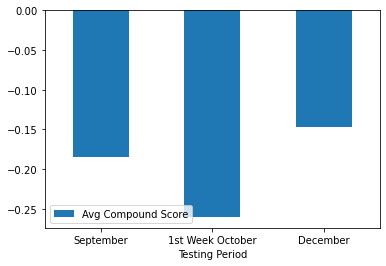

In [72]:
df = pd.DataFrame({'Testing Period':['September', '1st Week October', 'December'], 'Avg Compound Score':list2})
ax = df.plot.bar(x='Testing Period', y='Avg Compound Score', rot=0)